In [208]:
import numpy                       
from matplotlib import pyplot 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
import sympy
sympy.init_printing()
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

I am going to do a 1D convection in X direction and 1D wave in another direction inside a 100*100 pool and plot the 2D figure of the overall picture along with the errors. Firstly suppose there is a 1D convection flux due to a constant difference of infinite fluid resorvior with sea level h0= 100 at X=0 while the height inside the pool is 0 everywhere ay the beginning.

In [337]:
(q, k, h0, h) = sympy.symbols('q k ho h')

In [167]:
eq=sympy.Eq(q,-k*(h0-h))

In [168]:
eq

The equation is h(t+deltat)=h(t)+q(h0-h(t)) This is a 1D ODE which could be solved by separation of variables. q is the flux and k is the convection constant according to Flouyer's law - Let's set it as 0.1.

In [169]:
sympy.init_printing(use_latex=False)

Plot of analytical BCs: the anaytical solution is h=h0(1-e**(-kt))

In [338]:
nt = int(100) 
dt = 1.0
e=numpy.e
T = numpy.arange(1,100, 1) 
h0 = 100.0
k= 0.1 #convection constant 
hBC = numpy.zeros(99) # initial height is zero inside the pool

In [241]:
def Get_analy_hBC(T,e,h0,hBC,k):
    hBC[0:] = h0*(1-e**(-T[0:]*k) )
    return hBC

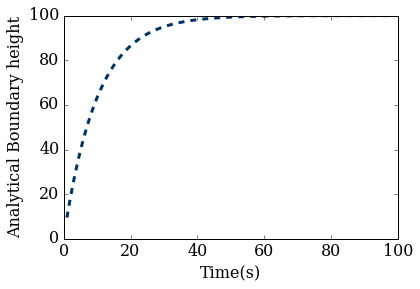

In [347]:
pyplot.plot(T, Get_analy_hBC(T,e,h0,hBC,k) , color='#003366', ls='--', lw=3)
pyplot.xlabel("Time(s)")
pyplot.ylabel("Analytical Boundary height")

This is the amount of flow at X=0 at every second

Plot of numerical BCs: convection from 100 to 0 and pass forward

In [236]:
def Get_num_hBC(T,nt,h0,hBC,k):
    hBC[0]= k*(h0-hBC[0])
    for n in range(1, nt): 
        hBC[1:]= hBC[0:-1]+k*(h0-hBC[0:-1])    
    return hBC

In [340]:
hBC = numpy.zeros(99)

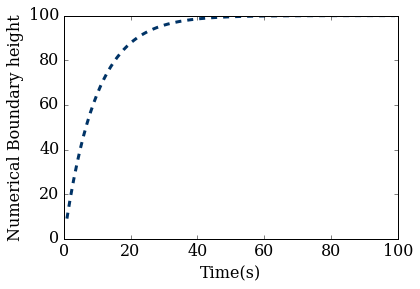

In [348]:
pyplot.plot(T, Get_num_hBC(T,nt,h0,hBC,k) , color='#003366', ls='--', lw=3)
pyplot.xlabel("Time(s)")
pyplot.ylabel("Numerical Boundary height")

This result is close to the analytical result

Then suppose there is a 1D wave equation for 10*sin(0.1*pi*t) at Y=0 

In [243]:
def Get_analy_wBC(T):
    wBC = numpy.zeros(99)
    wBC[0:] = 10*numpy.sin(numpy.pi*T[0:]/10)
    return wBC

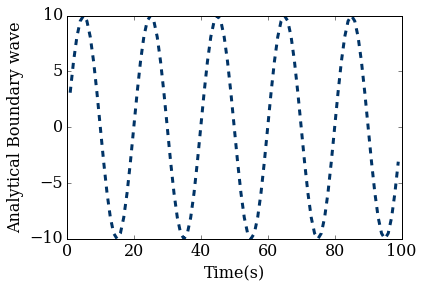

In [349]:
pyplot.plot(T, Get_analy_wBC(T) , color='#003366', ls='--', lw=3)
pyplot.xlabel("Time(s)")
pyplot.ylabel("Analytical Boundary wave")

The analytical soultion could be expressed with: [ W(t+1)-2*W(t)+W(t-1) ]/dt**2 = -(pi/10)**2 *W(t) 

In [344]:
def Get_num_wBC(T,nt):
    wBC = numpy.zeros(99)
    wBC[0]= 10*numpy.sin(numpy.pi/10)
    wBC[1]= 10*numpy.sin(numpy.pi*2.0/10)
    for n in range(1, nt): 
        wBC[2:] = ( (2- dt**2 *(numpy.pi/10)**2 )*wBC[1:-1]-wBC[0:-2])
    return wBC

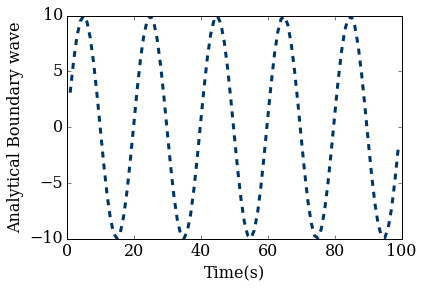

In [350]:
pyplot.plot(T, Get_num_wBC(T,nt) , color='#003366', ls='--', lw=3)
pyplot.xlabel("Time(s)")
pyplot.ylabel("Analytical Boundary wave")

In [315]:
def plot_3D(x, y, p):
    '''Creates 3D plot with appropriate limits and viewing angle
    
    Parameters:
    ----------
    x: array of float
        nodal coordinates in x
    y: array of float
        nodal coordinates in y
    p: 2D array of float
        calculated potential field
    
    '''
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)

Plug the 1D flow into 2 directions 2D arrays seperately, then get the summation. 

In [327]:
def h_analytical(x, y,h_x,h_y):
    X, Y = numpy.meshgrid(x,y)
    h_an = numpy.zeros(10000).reshape(100,100)
    h_1 = numpy.zeros(10000).reshape(100,100)
    h_2 = numpy.zeros(10000).reshape(100,100)
    for n in range(1, nt): 
        h_1[1:,n]= h_x[0:]
    for n in range(1, nt): 
        h_2[n,1:]= h_y[0:]
    h_an = h_1+h_2
    return h_an

In [328]:
def h_numerical(x, y,h_x,h_y):
    X, Y = numpy.meshgrid(x,y)
    h_nu = numpy.zeros(10000).reshape(100,100)
    h_1 = numpy.zeros(10000).reshape(100,100)
    h_2 = numpy.zeros(10000).reshape(100,100)
    for n in range(1, nt): 
        h_1[1:,n]= h_x[0:]
    for n in range(1, nt): 
        h_2[n,1:]= h_y[0:]
    h_nu = h_1+h_2
    return h_nu

In [329]:
nx = 100
ny = 100

x = numpy.arange(1,nx, 1)
y = numpy.arange(1,ny, 1)

h_anx=Get_analy_hBC(x,e,h0,hBC,k)
h_any=Get_analy_wBC(y)

h_nux=Get_num_hBC(x,nt,h0,hBC,k)
h_nuy=Get_num_wBC(y,nt)

h_an = h_analytical(x, y, h_anx, h_any)
h_nu = h_analytical(x, y, h_nux, h_nuy)

Take the BCs out of the figure

In [330]:
h_an_1 = h_an[1:,1:]

In [331]:
h_nu_1 = h_nu[1:,1:]

Plot the figures for analytical solution and numerical solution

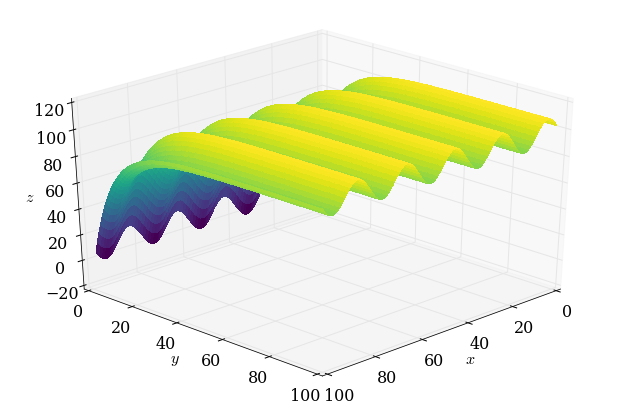

In [332]:
plot_3D(x, y, h_an_1)

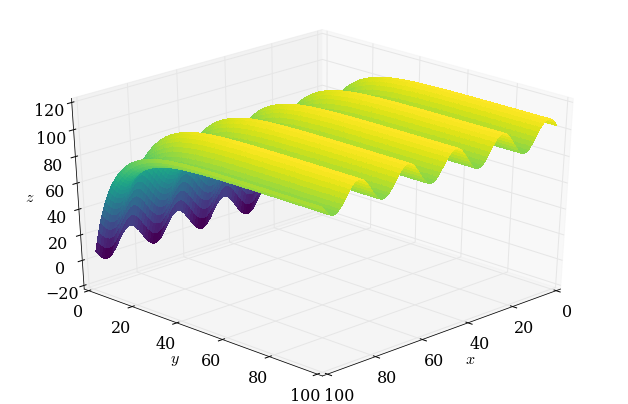

In [333]:
plot_3D(x, y, h_nu_1)

This is the difference between numerical solution and analytical ones. We can see it is evenly distributed along y axis but fiercely fluctuating along X axis.

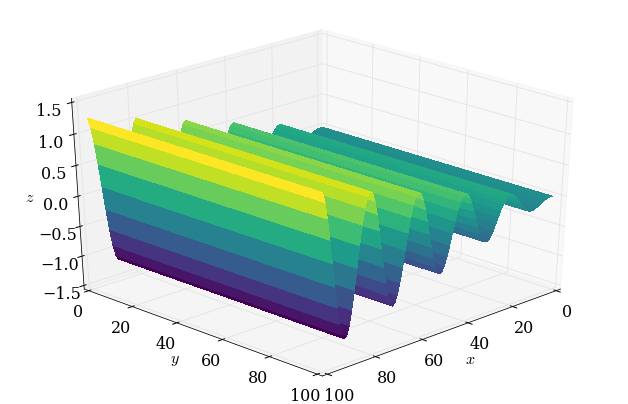

In [334]:
plot_3D(x, y, h_nu_1-h_an_1)

References:

Dennis G. Zill. Differential equations. Belmont, CA: Cengage Learning. 2009. Print.

John D. Anderson. Computational Fluid Dynamics. Mcgraw-Hill. 2007. Print.